In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

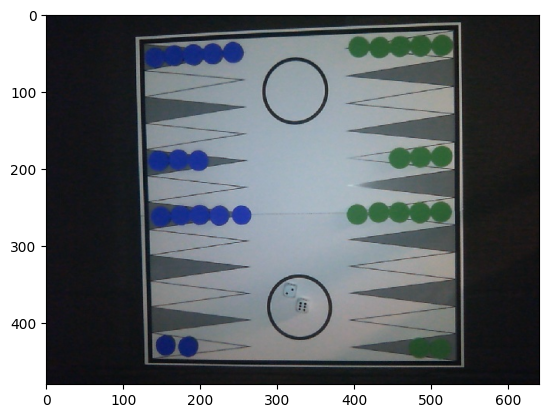

In [10]:
im = cv2.imread('../test650783.jpg')
plt.imshow(im)

In [13]:
# find circles in the image
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=30, maxRadius=50)
print(circles == None)

[[[False False False]
  [False False False]]]


(328, 380) 38
(324, 100) 43


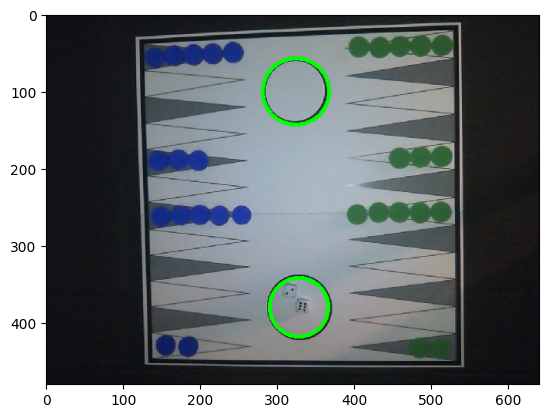

In [14]:
imcopy = im.copy()

# draw circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        radius = i[2]
        cv2.circle(imcopy, center, radius, (0, 255, 0), 3)
        print(center, radius)

plt.imshow(imcopy)

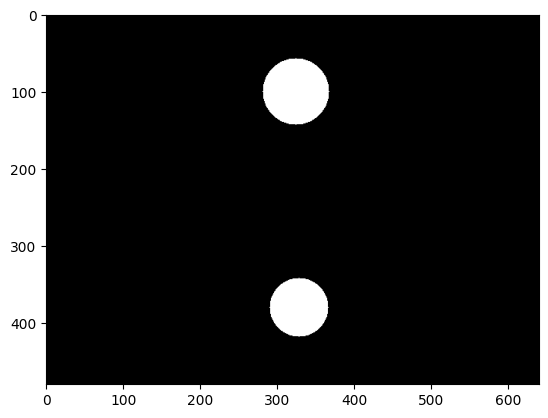

In [5]:
# create a mask for the circles
mask = np.zeros(im.shape[:2], dtype=np.uint8)
for i in circles[0, :]:
    center = (i[0], i[1])
    radius = i[2]
    cv2.circle(mask, center, radius, (255), -1)

plt.imshow(mask, cmap='gray')


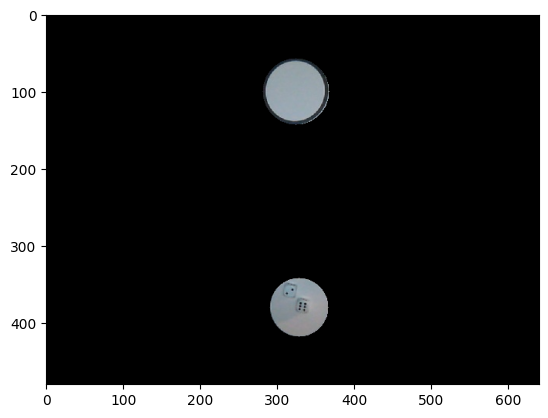

In [6]:
# apply the mask to the image
masked = cv2.bitwise_and(im, im, mask=mask)
plt.imshow(masked)

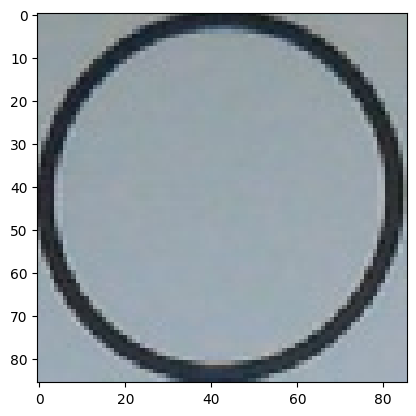

In [7]:
rois = []
# save the circles to separate images
for i, circle in enumerate(circles[0, :]):
    center = (circle[0], circle[1])
    radius = circle[2]
    x, y = center
    r = radius
    roi = im[y-r:y+r, x-r:x+r]
    rois.append(roi)
    plt.imshow(roi)
    cv2.imwrite(f'../circle_{i}.jpg', roi)

In [9]:
# count the number of small dots inside each roi
for i, roi in enumerate(rois):
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 5)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=5, maxRadius=10)
    print(f'Circle count in circle_{i}.jpg:', circles[0].shape[0])

TypeError: 'NoneType' object is not subscriptable